In [1]:
# import library

import pandas as pd

In [2]:
# load dataset

dataset=pd.read_csv("CSUSHPISA.csv")
dataset

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
435,2023-04-01,300.198
436,2023-05-01,302.620
437,2023-06-01,304.651
438,2023-07-01,306.634


# Standardization/ Normalizaton
# MinMax Scaler

In [3]:
# Time Series - Univariate

column="CSUSHPISA"

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(dataset[[column]])
print("Len:",data1.shape)

Len: (440, 1)


In [5]:
len(data1)

440

# Split Training and Testing data using series of data

In [6]:
# x_train, x_test  - input training and testing data
# y_train, y_test  - output training and testing data

training_size = round(len(data1 ) * 0.80)  # Total -440
print(training_size)

X_train=data1[:training_size]              # first 0:352
X_test=data1[training_size:]               # 88: last
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)

y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

352
X_train length: (352, 1)
X_test length: (88, 1)
y_train length: (352, 1)
y_test length: (88, 1)


# Model Creation

In [7]:
! pip install stockFunctions

ERROR: Could not find a version that satisfies the requirement stockFunctions (from versions: none)
ERROR: No matching distribution found for stockFunctions


In [8]:
from sklearn.metrics import mean_squared_error

trends=['n','t','c','ct']
lags=[1,2,3,4]

from statsmodels.tsa.ar_model import AutoReg

for i in lags:
    #print(i)   
    for td in trends:        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        
        # from UserDefinedFns import rmsemape
        # rmsemape(y_test,y_pred)
        
        from sklearn import metrics
        print("Lag={},Trend={}".format(i,td))
        # rmse - root mean squared error
        print("rmse :", metrics.mean_squared_error(y_test,y_pred))
        # mape - mean absolute percentage error
        print("mape :", metrics.mean_absolute_percentage_error(y_test,y_pred))
        
        
        print("************")

Lag=1,Trend=n
rmse : 0.02972818334767734
mape : 0.15036086145906993
************
Lag=1,Trend=t
rmse : 0.030172618180040602
mape : 0.1490476252773987
************
Lag=1,Trend=c
rmse : 0.043997324581833634
mape : 0.19212903711680848
************
Lag=1,Trend=ct
rmse : 0.04178784858929011
mape : 0.18575980266902306
************
Lag=2,Trend=n
rmse : 0.04360900122874988
mape : 0.18419796424930432
************
Lag=2,Trend=t
rmse : 0.03875895774874502
mape : 0.1689285820019168
************
Lag=2,Trend=c
rmse : 0.06354260105113173
mape : 0.23007898887371303
************
Lag=2,Trend=ct
rmse : 0.03865479873540433
mape : 0.16860111847445208
************
Lag=3,Trend=n
rmse : 0.044648209567822846
mape : 0.18643277014947948
************
Lag=3,Trend=t
rmse : 0.03935938804331178
mape : 0.17033364059531927
************
Lag=3,Trend=c
rmse : 0.06567133373525008
mape : 0.23401729952554684
************
Lag=3,Trend=ct
rmse : 0.039092759101775114
mape : 0.16950087008969936
************
Lag=4,Trend=n
rmse : 0.

In [9]:
len(y_pred)

88

# Lag=1,Trend=n

In [10]:
# choose minimum rmse and mape values of lag and trend

i=1
td='n'

model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)

# from stockFunctions import rmsemape

from sklearn import metrics
print("Lag={},Trend={}".format(i,td))
# rmse - root mean squared error
print("rmse :", metrics.mean_squared_error(y_test,y_pred))
# mape - mean absolute percentage error
print("mape :", metrics.mean_absolute_percentage_error(y_test,y_pred))

# rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=n
rmse : 0.02972818334767734
mape : 0.15036086145906993
************


# Graph

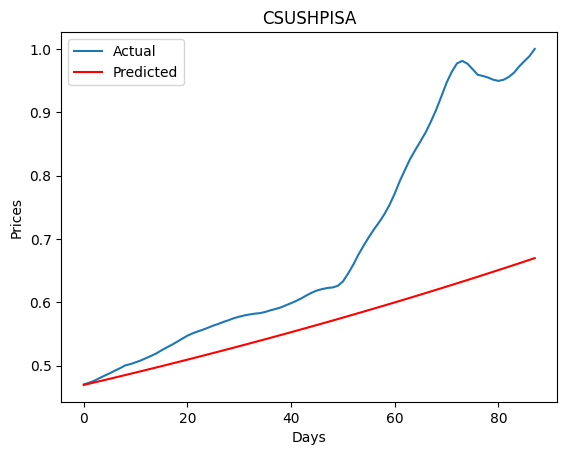

In [11]:
import matplotlib.pyplot as plt

# plt.plot("Actual ",y_test)
# plt.plot("Predicted ", y_pred,colors='red')
plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(y_test, label='Actual')
plt.plot(y_pred,color='red', label='Predicted')
plt.legend()
plt.show()

In [12]:
len(data1)

440

In [13]:
# Actual values

y_test

array([[0.47043868],
       [0.47310737],
       [0.47616312],
       [0.48030264],
       [0.48426697],
       [0.48804387],
       [0.49215487],
       [0.49609068],
       [0.50049096],
       [0.50256072],
       [0.50532719],
       [0.5083096 ],
       [0.5119439 ],
       [0.51559858],
       [0.51941623],
       [0.52435839],
       [0.52882386],
       [0.53308561],
       [0.53778332],
       [0.542754  ],
       [0.54738245],
       [0.55110231],
       [0.55409287],
       [0.55692046],
       [0.56004954],
       [0.56336605],
       [0.56609585],
       [0.56927791],
       [0.57198734],
       [0.57511235],
       [0.5773899 ],
       [0.57938632],
       [0.58089383],
       [0.5821528 ],
       [0.58296359],
       [0.58483371],
       [0.58740868],
       [0.58953141],
       [0.59198823],
       [0.59541067],
       [0.59871496],
       [0.60236148],
       [0.60642359],
       [0.61110907],
       [0.61534231],
       [0.61877697],
       [0.62092821],
       [0.622

In [14]:
# actual values -  y_test
# Convert minmax scaler into inverse_transform 

actual=Ms.inverse_transform(y_test)

In [15]:
# Predcted values

y_pred

array([0.46964986, 0.47157015, 0.47349828, 0.4754343 , 0.47737823,
       0.47933012, 0.48128998, 0.48325786, 0.48523378, 0.48721778,
       0.48920989, 0.49121015, 0.49321859, 0.49523524, 0.49726014,
       0.49929331, 0.5013348 , 0.50338463, 0.50544285, 0.50750948,
       0.50958456, 0.51166813, 0.51376021, 0.51586085, 0.51797008,
       0.52008793, 0.52221444, 0.52434965, 0.52649359, 0.52864629,
       0.5308078 , 0.53297814, 0.53515735, 0.53734548, 0.53954256,
       0.54174861, 0.54396369, 0.54618782, 0.54842105, 0.55066341,
       0.55291494, 0.55517567, 0.55744565, 0.55972491, 0.56201348,
       0.56431142, 0.56661875, 0.56893551, 0.57126175, 0.5735975 ,
       0.5759428 , 0.57829769, 0.58066221, 0.58303639, 0.58542028,
       0.58781392, 0.59021735, 0.5926306 , 0.59505372, 0.59748675,
       0.59992973, 0.60238269, 0.60484569, 0.60731875, 0.60980193,
       0.61229526, 0.61479879, 0.61731255, 0.61983659, 0.62237095,
       0.62491567, 0.62747079, 0.63003637, 0.63261243, 0.63519

In [16]:
# Reshape y_pred values

y_pred_reshape=y_pred.reshape(-1,1)
y_pred_reshape

array([[0.46964986],
       [0.47157015],
       [0.47349828],
       [0.4754343 ],
       [0.47737823],
       [0.47933012],
       [0.48128998],
       [0.48325786],
       [0.48523378],
       [0.48721778],
       [0.48920989],
       [0.49121015],
       [0.49321859],
       [0.49523524],
       [0.49726014],
       [0.49929331],
       [0.5013348 ],
       [0.50338463],
       [0.50544285],
       [0.50750948],
       [0.50958456],
       [0.51166813],
       [0.51376021],
       [0.51586085],
       [0.51797008],
       [0.52008793],
       [0.52221444],
       [0.52434965],
       [0.52649359],
       [0.52864629],
       [0.5308078 ],
       [0.53297814],
       [0.53515735],
       [0.53734548],
       [0.53954256],
       [0.54174861],
       [0.54396369],
       [0.54618782],
       [0.54842105],
       [0.55066341],
       [0.55291494],
       [0.55517567],
       [0.55744565],
       [0.55972491],
       [0.56201348],
       [0.56431142],
       [0.56661875],
       [0.568

In [17]:
# predicted values -  y_pred
# Convert minmax scaler into inverse_transform 

predicted=Ms.inverse_transform(y_pred_reshape)
predicted

array([[179.23539308],
       [179.70670539],
       [180.17994478],
       [180.65511913],
       [181.13223635],
       [181.61130439],
       [182.09233122],
       [182.57532485],
       [183.06029332],
       [183.54724471],
       [184.03618712],
       [184.5271287 ],
       [185.02007762],
       [185.51504208],
       [186.01203034],
       [186.51105065],
       [187.01211134],
       [187.51522074],
       [188.02038723],
       [188.52761923],
       [189.03692517],
       [189.54831353],
       [190.06179284],
       [190.57737164],
       [191.09505852],
       [191.61486208],
       [192.136791  ],
       [192.66085396],
       [193.18705968],
       [193.71541693],
       [194.2459345 ],
       [194.77862123],
       [195.31348598],
       [195.85053766],
       [196.38978521],
       [196.93123762],
       [197.47490389],
       [198.02079308],
       [198.56891427],
       [199.1192766 ],
       [199.67188923],
       [200.22676135],
       [200.78390221],
       [201

In [35]:
from UserDefinedFns import conversionSingle
actual=Ms.inverse_transform(y_test)
actual_price=conversionSingle(actual,[column])
actual_price

,CSUSHPISA
0,179.429
1,180.084
2,180.834
3,181.85
4,182.823
...,...
83,300.198
84,302.62
85,304.651
86,306.634


In [36]:
from UserDefinedFns import conversionSingle
predicted=Ms.inverse_transform(y_pred_reshape)
predicted_price=conversionSingle(predicted,[column])
predicted_price

,CSUSHPISA
0,179.235393
1,179.706705
2,180.179945
3,180.655119
4,181.132236
...,...
83,225.699372
84,226.360664
85,227.02466
86,227.691371


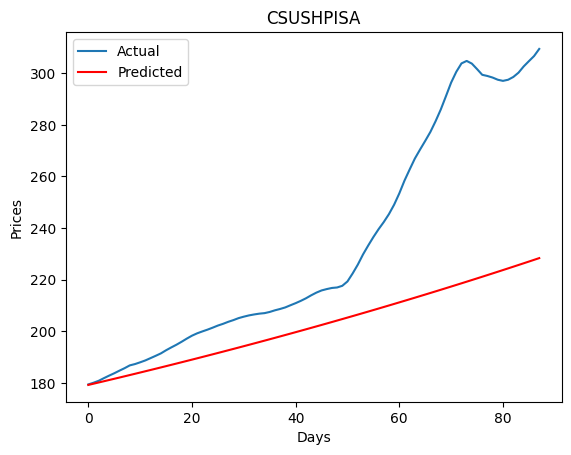

In [20]:
import matplotlib.pyplot as plt

plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(actual_price, label='Actual')
plt.plot(predicted_price,color='red', label='Predicted')
plt.legend()
plt.show()

# Evaluation Metrics

In [22]:
# Evaluation metrics for actual price and predicted price

# rmse - root mean squared error
print("rmse :", metrics.mean_squared_error(actual_price,predicted_price))
# mape - mean absolute percentage error
print("mape :", metrics.mean_absolute_percentage_error(actual_price,predicted_price))

rmse : 1790.834764209474
mape : 0.11331179033014349


# CSUSHPISA Forcasted for 5 days

In [25]:
# Time Series Analysis - Forcasting
# CSUSHPISA Forecast for 5 days 

forecast=model_fit.predict(len(data1), len(data1)+4)
forecast

array([0.67254178, 0.67529164, 0.67805274, 0.68082513, 0.68360886])

In [33]:
from UserDefinedFns import conversionSingle

forecastTable=conversionSingle(forecast,["Predicted_CSUSHPISA"])
forecast_price=Ms.inverse_transform(forecastTable)
Predicted_forecast_price=conversionSingle(forecast_price,["Predicted_CSUSHPISA"])
Predicted_forecast_price

,Predicted_CSUSHPISA
0,229.032982
1,229.707904
2,230.385586
3,231.066039
4,231.749274


In [34]:
Predicted_forecast_price.to_csv("Predicted_CSUSHPISA.csv",index=False)